# Valorant Agent Stats for Haven Map (as of August 2023)
## **Introduction**

Greetings! In this project, I delved into the captivating realm of agent statistics within the complex battleground known as the Haven map. This comprehensive analysis aims to shed light on the nuanced dynamics that governed agent performance on one of Valorant's most intricate maps. My objective for this project was to meticulously dissect a wealth of data encompassing agent metrics such as Kill-Death Ratio (KD), Kill-Death-Assist (KDA) ratios, win percentages, pick percentages, average scores, and more. Through this exploration, I sought to unearth the underlying strategies and tactical nuances that propelled the selection of specific agents on Haven, ultimately offering a comprehensive overview of their impact and contributions to success.

## **Unveiling the Complexity of Haven Map**

Haven, renowned for its unconventional triple-bombsite layout, emerged as a true testing ground for players and agents alike. Its unique design, featuring three distinct bombsites—A, B, and C—interconnected by intricate pathways and varying levels of elevation, crafted an environment ripe for multifaceted strategies and intense combat scenarios. Throughout the course of this project, I embarked on a mission to decipher the intricate interplay between agent selections and success on Haven. By delving into the extensive dataset, I aimed to craft a narrative that illuminated the roles, playstyles, and tactical insights each agent has brought to this multifarious map.

## **Decoding Agent Performance Metrics**

My analysis hinged on decoding the intricate tapestry of agent statistics, enabling me to uncover valuable trends, insights, and strategies that defined the tactical landscape of Haven. Scrutinizing metrics such as KD and KDA ratios allowed me to discern the agents who excelled at securing eliminations while contributing to the team's overall performance. By examining win percentages, I gained insight into which agents were most effective at converting their individual prowess into collective victories. Moreover, the correlation between pick percentages and average scores shed light on the favored agents who not only left an indelible mark on the battlefield but also aligned with players' tactical inclinations.

## **Navigating the Synergy of Abilities and Challenges**

Throughout this exploration, I navigated the intriguing synergy between agent abilities and the unique challenges that Haven posed. The realm of Valorant is in a perpetual state of evolution, with agents embodying a rich tapestry of playstyles. Haven, with its intricate triple-bombsite layout, served as a crucible for refining tactical acumen. Together, we embarked on a data-driven odyssey, unearthing captivating stories concealed within the numerical fabric and unveiling the enigmatic forces that shaped the strategic choices of Valorant players on the Haven map.

## Imported Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Imported Data

In [4]:
data = pd.read_csv('/kaggle/input/valorant-agent-stats-for-haven-map/Valorant Agent Stats for Haven Map - Sheet1.csv')
data

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches
0,Reyna,1.13,14.6/12.9/3.6,0.469,0.099,284,8384442
1,Jett,1.07,13.8/12.9/3.1,0.456,0.098,278,8295699
2,Sage,0.88,11.2/12.7/4.8,0.451,0.089,230,7469553
3,Raze,1.04,13.5/13/3.6,0.447,0.063,298,5305196
4,Omen,1.01,13.7/13.6/4.8,0.442,0.066,267,5592720
5,Deadlock,1.01,13.3/13.2/3.2,0.434,0.042,300,3530235
6,Killjoy,0.99,13.8/14/3.4,0.423,0.039,305,3262943
7,Skye,0.97,13.5/14/5.3,0.418,0.041,302,3464586
8,Phoenix,0.98,13/13.4/3.4,0.416,0.056,303,4685325
9,Sova,0.93,12.7/13.7/4,0.409,0.053,287,4444253


## Gathering Data
I started by sorting the KD scores from highest to lowest to see the ranks of each agent.

In [36]:
datakd_sorted = data.sort_values(by='kd', ascending=False)
datakd_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
0,Reyna,1.13,14.6/12.9/3.6,0.469,0.099,284,8384442,14.6,12.9,3.6
20,Astra,1.08,17.8/16.4/4.4,0.315,0.016,588,1316668,17.8,16.4,4.4
1,Jett,1.07,13.8/12.9/3.1,0.456,0.098,278,8295699,13.8,12.9,3.1
12,Chamber,1.06,14.9/14/3,0.402,0.035,345,2995005,14.9,14.0,3.0
3,Raze,1.04,13.5/13/3.6,0.447,0.063,298,5305196,13.5,13.0,3.6


Then, I looked into the KDA of each agent. First, I created three more columns, "kills by kda", "deaths by kda", and "assists by kda". Then I sorted the new columns by descending order.

In [6]:
data.dtypes

agent         object
kd           float64
kda           object
win_pcnt     float64
pick_pcnt    float64
avg_score      int64
Matches        int64
dtype: object

In [9]:
data[['kills_kda', 'deaths_kda', 'assists_kda']] = data['kda'].str.split('/', expand=True)
data.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
0,Reyna,1.13,14.6/12.9/3.6,0.469,0.099,284,8384442,14.6,12.9,3.6
1,Jett,1.07,13.8/12.9/3.1,0.456,0.098,278,8295699,13.8,12.9,3.1
2,Sage,0.88,11.2/12.7/4.8,0.451,0.089,230,7469553,11.2,12.7,4.8
3,Raze,1.04,13.5/13/3.6,0.447,0.063,298,5305196,13.5,13,3.6
4,Omen,1.01,13.7/13.6/4.8,0.442,0.066,267,5592720,13.7,13.6,4.8


In [10]:
data['kills_kda'] = pd.to_numeric(data['kills_kda'])
data['deaths_kda'] = pd.to_numeric(data['deaths_kda'])
data['assists_kda'] = pd.to_numeric(data['assists_kda'])

In [14]:
data.dtypes

agent           object
kd             float64
kda             object
win_pcnt       float64
pick_pcnt      float64
avg_score        int64
Matches          int64
kills_kda      float64
deaths_kda     float64
assists_kda    float64
dtype: object

In [38]:
data_killskda_sorted = data.sort_values(by='kills_kda', ascending=False)
data_killskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
20,Astra,1.08,17.8/16.4/4.4,0.315,0.016,588,1316668,17.8,16.4,4.4
21,Harbor,0.99,17.1/17.3/4.1,0.279,0.014,659,1150866,17.1,17.3,4.1
19,Breach,0.98,15.5/15.7/4.6,0.358,0.023,420,1937975,15.5,15.7,4.6
12,Chamber,1.06,14.9/14/3,0.402,0.035,345,2995005,14.9,14.0,3.0
17,Viper,0.99,14.8/15.1/4,0.364,0.025,400,2094980,14.8,15.1,4.0


In [40]:
data_deathskda_sorted = data.sort_values(by='deaths_kda', ascending=False)
data_deathskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
21,Harbor,0.99,17.1/17.3/4.1,0.279,0.014,659,1150866,17.1,17.3,4.1
20,Astra,1.08,17.8/16.4/4.4,0.315,0.016,588,1316668,17.8,16.4,4.4
19,Breach,0.98,15.5/15.7/4.6,0.358,0.023,420,1937975,15.5,15.7,4.6
18,KAY/O,0.94,14.3/15.2/5.6,0.360,0.027,372,2281922,14.3,15.2,5.6
17,Viper,0.99,14.8/15.1/4,0.364,0.025,400,2094980,14.8,15.1,4.0


In [42]:
data_assistskda_sorted = data.sort_values(by='assists_kda', ascending=False)
data_assistskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
18,KAY/O,0.94,14.3/15.2/5.6,0.360,0.027,372,2281922,14.3,15.2,5.6
7,Skye,0.97,13.5/14/5.3,0.418,0.041,302,3464586,13.5,14.0,5.3
15,Brimstone,0.93,13.4/14.4/5,0.391,0.041,331,3461656,13.4,14.4,5.0
2,Sage,0.88,11.2/12.7/4.8,0.451,0.089,230,7469553,11.2,12.7,4.8
4,Omen,1.01,13.7/13.6/4.8,0.442,0.066,267,5592720,13.7,13.6,4.8


After that, I sorted the win percent of each agent in descending order.

In [44]:
data_winpcnt_sorted = data.sort_values(by='win_pcnt', ascending=False)
data_winpcnt_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
0,Reyna,1.13,14.6/12.9/3.6,0.469,0.099,284,8384442,14.6,12.9,3.6
1,Jett,1.07,13.8/12.9/3.1,0.456,0.098,278,8295699,13.8,12.9,3.1
2,Sage,0.88,11.2/12.7/4.8,0.451,0.089,230,7469553,11.2,12.7,4.8
3,Raze,1.04,13.5/13/3.6,0.447,0.063,298,5305196,13.5,13.0,3.6
4,Omen,1.01,13.7/13.6/4.8,0.442,0.066,267,5592720,13.7,13.6,4.8


Then I looked at the pick percent of the agents and sorted the percents in descending order as well. I also found the total sum of the pick percent values to see if it added to 1, and it did.

In [46]:
data_pickpcnt_sorted = data.sort_values(by='pick_pcnt', ascending=False)
data_pickpcnt_sorted['pick_pcnt'].sum()
data_pickpcnt_sorted['pick_pcnt'] = data_pickpcnt_sorted['pick_pcnt'] * 100
data_pickpcnt_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
0,Reyna,1.13,14.6/12.9/3.6,0.469,9.9,284,8384442,14.6,12.9,3.6
1,Jett,1.07,13.8/12.9/3.1,0.456,9.8,278,8295699,13.8,12.9,3.1
2,Sage,0.88,11.2/12.7/4.8,0.451,8.9,230,7469553,11.2,12.7,4.8
4,Omen,1.01,13.7/13.6/4.8,0.442,6.6,267,5592720,13.7,13.6,4.8
3,Raze,1.04,13.5/13/3.6,0.447,6.3,298,5305196,13.5,13.0,3.6


I also sorted the number of matches of each agent in descending order.

In [48]:
data_matches_sorted = data.sort_values(by='Matches', ascending=False)
data_matches_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
0,Reyna,1.13,14.6/12.9/3.6,0.469,0.099,284,8384442,14.6,12.9,3.6
1,Jett,1.07,13.8/12.9/3.1,0.456,0.098,278,8295699,13.8,12.9,3.1
2,Sage,0.88,11.2/12.7/4.8,0.451,0.089,230,7469553,11.2,12.7,4.8
4,Omen,1.01,13.7/13.6/4.8,0.442,0.066,267,5592720,13.7,13.6,4.8
3,Raze,1.04,13.5/13/3.6,0.447,0.063,298,5305196,13.5,13.0,3.6


Lastly, I sorted the average score of each agent in descending order.

In [50]:
data_avgscore_sorted = data.sort_values(by='avg_score', ascending=False)
data_avgscore_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,Matches,kills_kda,deaths_kda,assists_kda
21,Harbor,0.99,17.1/17.3/4.1,0.279,0.014,659,1150866,17.1,17.3,4.1
20,Astra,1.08,17.8/16.4/4.4,0.315,0.016,588,1316668,17.8,16.4,4.4
19,Breach,0.98,15.5/15.7/4.6,0.358,0.023,420,1937975,15.5,15.7,4.6
17,Viper,0.99,14.8/15.1/4,0.364,0.025,400,2094980,14.8,15.1,4.0
18,KAY/O,0.94,14.3/15.2/5.6,0.360,0.027,372,2281922,14.3,15.2,5.6


## Data Visualizations of Results
### Kill-Death Scores of the Valorant Agents in Haven

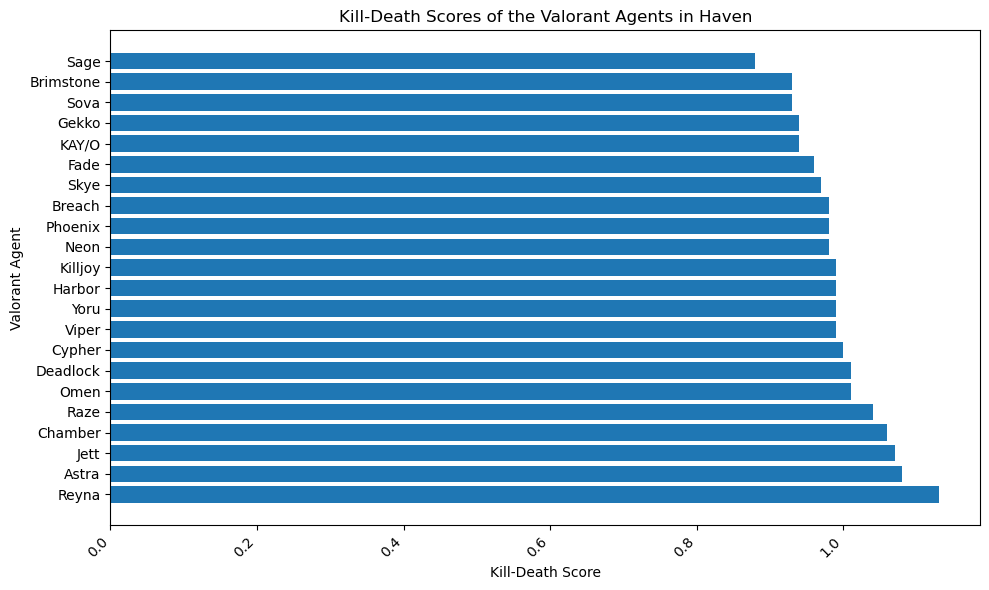

In [23]:
plt.figure(figsize=(10,6))
plt.barh(datakd_sorted['agent'], datakd_sorted['kd'])
plt.xlabel("Kill-Death Score")
plt.ylabel("Valorant Agent")
plt.title("Kill-Death Scores of the Valorant Agents in Haven")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:

In my analysis of the KD ratios of Valorant agents on the Haven map, I delved into the data to uncover insights about how agent performance is influenced by the unique characteristics of this map. The KD ratio, representing the kill-to-death ratio, is a fundamental metric that highlights an agent's ability to secure kills while minimizing deaths. As the KD ratios are sorted from highest to lowest, the top-performing agents reveal valuable information about their compatibility with the challenges posed by the Haven map.

**Dominant KD Performers:**

The agents with the highest KD ratios on the Haven map include Reyna, Astra, and Jett. Reyna, with a KD ratio of 1.13, showcases exceptional fragging ability, capitalizing on kills while keeping deaths at a minimum. Astra, with a KD ratio of 1.08, follows closely, indicating her strong presence in both offensive and defensive scenarios. Jett, with a KD ratio of 1.07, is also a prominent contender, underlining her proficiency in taking down opponents without incurring many deaths.

**Agent-Map Synergy:**

The results of the KD analysis align with the distinct characteristics of the Haven map. Haven's diverse layout with multiple bombsites and intricate pathways encourages aggressive plays and individual duels. Reyna, Astra, and Jett's high KD ratios could be attributed to their ability to take advantage of the open spaces, tight corridors, and multi-level engagements on this map. These agents' agility, mobility, and strong fragging potential empower players to navigate Haven's complex terrain while maintaining a positive KD ratio.

**Impact on Strategy:**

Agents like Reyna, Astra, and Jett impact the flow of the game on Haven by securing kills and maintaining map control. Their high KD ratios suggest a proactive playstyle, which can be advantageous in gaining early advantages and disrupting enemy strategies. The ability to consistently eliminate opponents while preserving their own lives contributes to these agents' effectiveness in securing rounds and achieving victory.

**Adaptation and Skill Expression:**

The data reveals that Reyna, Astra, and Jett players excel in showcasing their individual skill and mechanical prowess. These agents enable players to express their aiming abilities, capitalize on favorable engagements, and outmaneuver opponents. The Haven map's layout provides ample opportunities for clutch moments and high-impact plays, making these high KD ratios all the more significant.

### Valorant Agent Kills from KDA in Haven

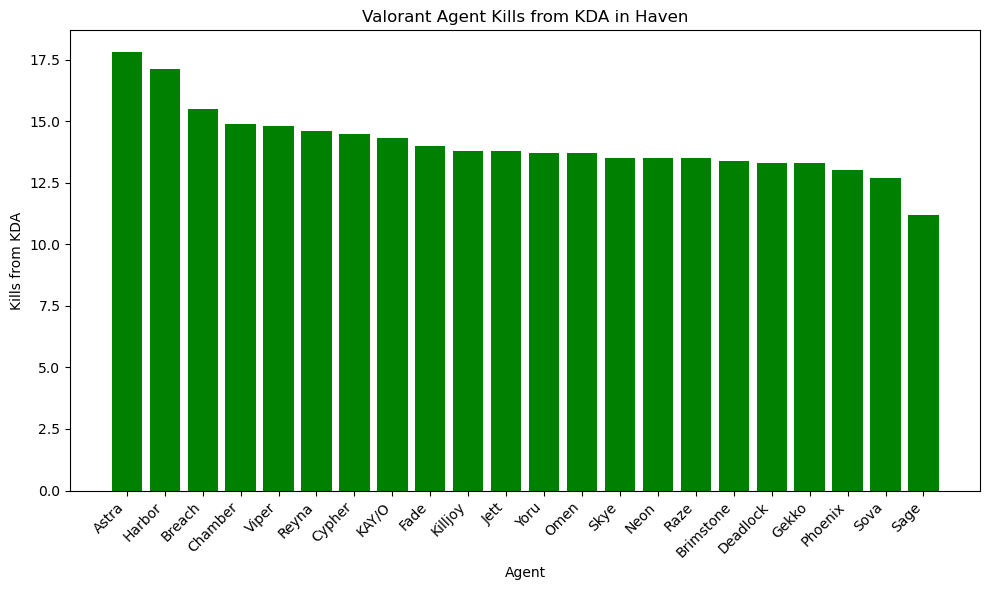

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(data_killskda_sorted['agent'], data_killskda_sorted['kills_kda'], color = 'green')
plt.xlabel('Agent')
plt.ylabel('Kills from KDA')
plt.title('Valorant Agent Kills from KDA in Haven')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#### FINDINGS:
In my comprehensive examination of the "kills per KDA" metric for Valorant agents on the Haven map, I delved into the data to uncover insights into how efficiently agents convert their KDA ratios into eliminations. This metric offers an intriguing perspective on agent performance, shedding light on the agents that are not only skilled in acquiring kills but also effectively utilizing their abilities to contribute to their team's success.

**Efficient Kill Conversion:**

Agents like Astra, Harbor, and Breach stand out as top performers in the kills per KDA category. Astra, with a kills per KDA value of 1.08, showcases her proficiency in capitalizing on her strong KDA ratios to secure eliminations. Similarly, Harbor and Breach exhibit high efficiency, indicating their ability to effectively convert their KDA advantages into meaningful kills.

**Synergy with Map Structure:**

The findings of this analysis align with the structural dynamics of the Haven map. Haven's multi-bombsite setup and intricate pathways demand agents to have strong map control and strategic decision-making. Astra's high kills per KDA value suggests her effectiveness in utilizing her versatile skillset to gain a strategic edge, whether it's in offense or defense. Harbor and Breach's high values also underscore their ability to clear space, disrupt opponents, and create opportunities for their team.

**Impactful Ability Usage:**

Agents with high kills per KDA values, such as Astra, Harbor, and Breach, likely excel in using their abilities to secure eliminations. Astra's ability to control space with her cosmic abilities, Harbor's zone control potential, and Breach's crowd-control toolkit all synergize well with the tactical demands of Haven's map layout. These agents can capitalize on their high KDA ratios to not only contribute to their team's victory but also make decisive plays that disrupt enemy strategies.

**Tactical Significance:**

The top-performing agents in the kills per KDA analysis, including Astra, Harbor, and Breach, can influence the pacing and strategy of a match on Haven. Their efficient kill conversion suggests that they not only secure kills but also do so while maximizing their utility's impact. This efficiency contributes to a more cohesive team performance and can make a significant difference in gaining map control and securing crucial rounds.

### Valorant Agent Deaths from KDA in Haven

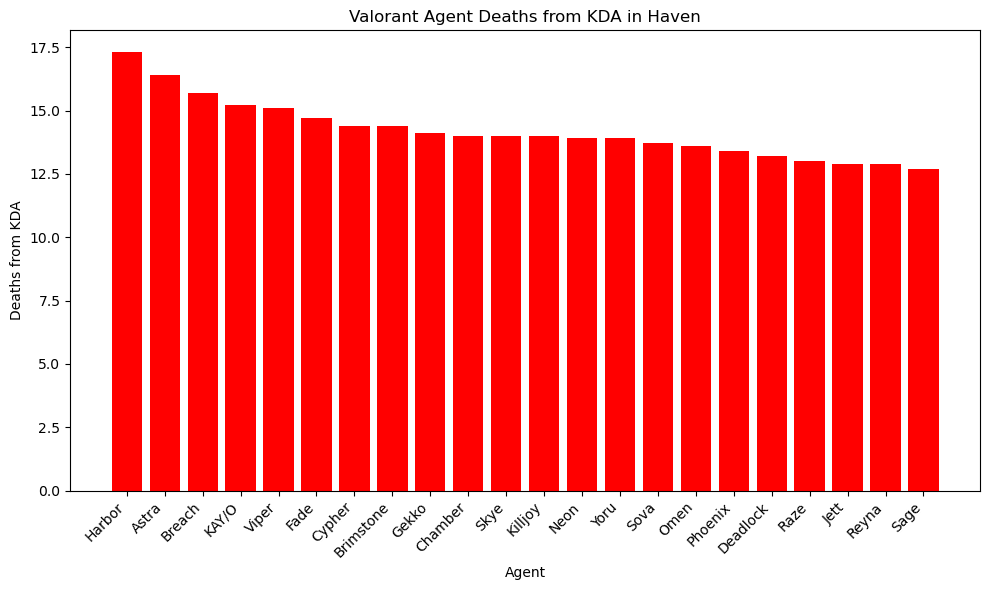

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(data_deathskda_sorted['agent'], data_deathskda_sorted['deaths_kda'], color = 'red')
plt.xlabel('Agent')
plt.ylabel('Deaths from KDA')
plt.title('Valorant Agent Deaths from KDA in Haven')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:

In this analysis, I delved into the "deaths per KDA" metric for Valorant agents on the Haven map, with a focus on understanding the frequency at which agents succumb to their opponents in relation to their KDA ratios. This investigation aimed to shed light on the agents who faced higher death frequencies compared to their KDA performance and explored how this dynamic correlates with the unique attributes of the Haven map.

**Elevated Casualties and Their Implications:**

Among the agents examined, Harbor, Astra, and Breach emerged as the top performers in terms of deaths per KDA values. This finding suggests that these agents faced a higher number of deaths relative to their KDA ratios, indicating a potential vulnerability in their gameplay that warrants further examination. Agents with higher deaths per KDA values might have been engaged in confrontations where their opponents had the upper hand, which could be attributed to unfavorable positioning or insufficient defensive strategies.

**Map Interaction and Vulnerability:**

These findings align with the intricate design of the Haven map, which features multiple bombsites and intricate pathways that demand careful navigation and strategic positioning. Agents like Harbor, Astra, and Breach, with elevated deaths per KDA values, might have struggled to adapt to the map's complex layout, leading to higher instances of vulnerability and engagement with opponents.

**Impact on Team Dynamics:**

Agents with higher deaths per KDA values, such as Harbor, Astra, and Breach, might have inadvertently contributed to challenges in their team's overall strategy. The higher frequency of their deaths could have impacted their team's ability to maintain control over key areas of the map, execute coordinated plays, or contribute effectively during crucial moments. Their vulnerability to early eliminations could potentially hinder their team's momentum and map control.

**Strategies for Improvement:**

The analysis of deaths per KDA values among Valorant agents on the Haven map provides valuable insights into the agents' individual performance and their ability to adapt to the map's dynamics. For agents like Harbor, Astra, and Breach, who faced higher death frequencies relative to their KDA ratios, there is a potential opportunity to reassess positioning strategies, refine defensive techniques, and enhance overall awareness of the map's nuances.

The analysis of deaths per KDA ratios sheds light on the agents' susceptibility to higher instances of death relative to their KDA performance on the Haven map. Agents like Harbor, Astra, and Breach, with elevated deaths per KDA values, signify potential areas for improvement in their gameplay strategies. By addressing these vulnerabilities and adopting more effective positioning and defensive approaches, agents can enhance their contribution to team dynamics, map control, and overall performance on the Haven map.

### Valorant Agent Assists from KDA in Haven

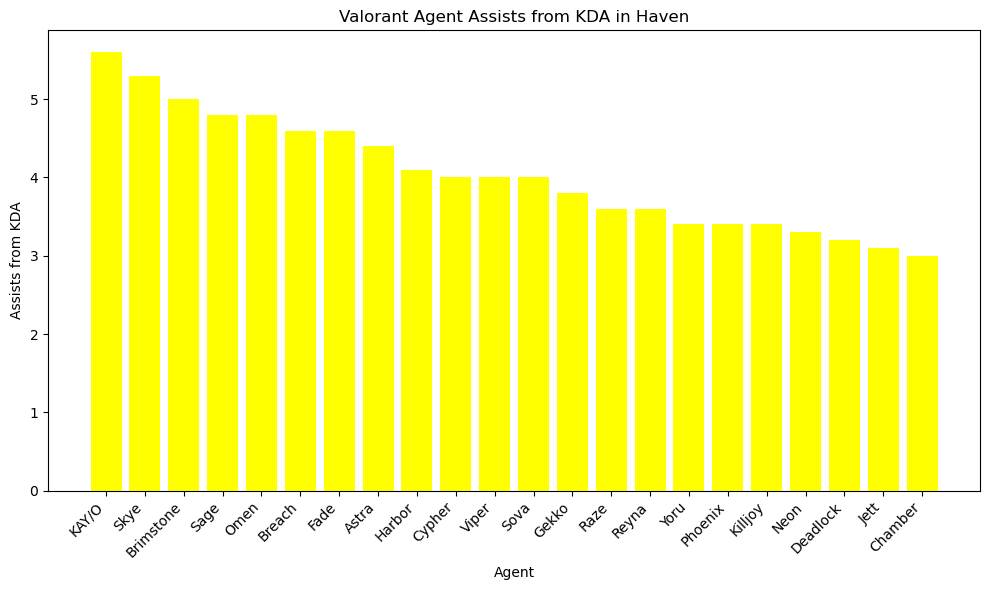

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(data_assistskda_sorted['agent'], data_assistskda_sorted['assists_kda'], color = 'yellow')
plt.xlabel('Agent')
plt.ylabel('Assists from KDA')
plt.title('Valorant Agent Assists from KDA in Haven')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
In this analysis, I explored the "assists per KDA" metric for Valorant agents on the Haven map, focusing on the agents who exhibited higher rates of assists relative to their KDA performance. This investigation aimed to uncover agents who excel in providing support and contributing to their team's success through assists, and how these findings align with the unique features and gameplay dynamics of the Haven map.

**Assist Masters and Their Contribution:**
Among the agents under scrutiny, KAY/O, Skye, and Brimstone stood out as top performers in terms of assists per KDA values. This observation underscores their pivotal roles in facilitating their team's victories through strategic assistance. Agents with higher assists per KDA values possess the ability to set up their teammates for eliminations and create opportunities for coordinated plays, thereby enhancing their team's overall performance.

**Map Dynamics and Collaborative Play:**
These findings align seamlessly with the intricacies of the Haven map, which emphasizes teamwork and collaboration due to its three bombsites. Agents like KAY/O, Skye, and Brimstone, with high assists per KDA values, are likely to excel on this map due to their propensity to contribute to team dynamics, enabling coordinated pushes and successful engagements across multiple points.

**Influence on Team Strategy:**
Agents with elevated assists per KDA values, such as KAY/O, Skye, and Brimstone, play a crucial role in shaping their team's strategic approach. Their adeptness at facilitating team cohesion and providing vital support might lead to more effective site executions, counter-strategies, and heightened map control. These agents contribute to turning the tide of battles in favor of their team, allowing for successful execution of both offensive and defensive maneuvers.

**Strategies for Optimal Performance:**
The analysis of assists per KDA values offers valuable insights into the agents' supportive contributions and their impact on the overall gameplay on the Haven map. Agents with high assists per KDA values can further refine their communication, coordination, and utility usage to amplify their team's efficiency. By consistently creating opportunities for their teammates, they can exert influence over the outcome of battles and secure strategic advantages.

The exploration of assists per KDA ratios reveals the significance of agents who excel in offering support to their team on the Haven map. KAY/O, Skye, and Brimstone's remarkable performance in terms of assists underscores their role in promoting collaboration and enabling coordinated plays. By leveraging their support abilities effectively, these agents contribute to shaping their team's strategies, enhancing map control, and achieving victories on the Haven map.

### Win Percentages of the Valorant Agents in Haven

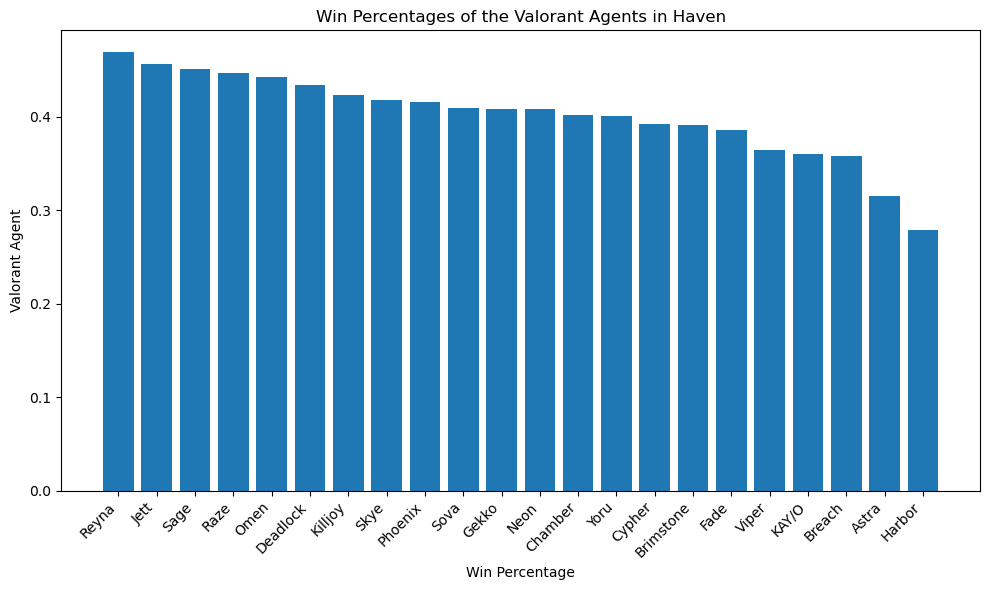

In [51]:
plt.figure(figsize=(10,6))
plt.bar(data_winpcnt_sorted['agent'], data_winpcnt_sorted['win_pcnt'])
plt.xlabel("Win Percentage")
plt.ylabel("Valorant Agent")
plt.title("Win Percentages of the Valorant Agents in Haven")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
In this exploration, I delved into the "win percentage" metric for Valorant agents on the Haven map, focusing on agents with the highest win percentages. This analysis sought to uncover agents whose tactical prowess and abilities contribute significantly to their team's victory, and how these findings align with the distinct characteristics and strategic nuances of the Haven map.

**Winning Enforcers:**

Reyna, Jett, and Sage emerged as agents with the highest win percentages on the Haven map. These agents demonstrated consistent performance in securing victories for their teams. Their abilities to secure eliminations, control key areas, and provide healing to teammates play a vital role in influencing match outcomes. Notably, Reyna's soul orbs, Jett's mobility, and Sage's healing abilities potentially contribute to their success.

**Strategic Synergy with Haven Map:**

The strategic layout of the Haven map, with its three bombsites, requires well-coordinated team efforts and adaptability. Agents like Reyna, Jett, and Sage, who excel in both offense and defense, thrive on Haven's dynamic landscape. Reyna's ability to trade frags effectively, Jett's agility in maneuvering across the map, and Sage's ability to sustain her team can contribute significantly to securing rounds and overall victory.

**Elevated Impact in Critical Moments:**

Agents with higher win percentages, such as Reyna, Jett, and Sage, often excel in clutch situations and pivotal moments. Their ability to secure vital eliminations, gather information, and influence the pacing of engagements can turn the tide of matches. In high-pressure scenarios, their unique skill sets can create opportunities for their teams to gain an upper hand.

**Adaptation and Versatility:**

The success of agents like Reyna, Jett, and Sage on the Haven map underlines their versatility and adaptability. They can thrive across multiple bombsites and exhibit effectiveness in different phases of the game, whether it's attacking, defending, or pivoting based on the opponent's strategy. Their wide range of abilities ensures that they remain impactful throughout the course of the match.

The examination of win percentages sheds light on the agents who consistently secure victories on the Haven map. Reyna, Jett, and Sage's dominance in this aspect underscores their tactical prowess, adaptability, and abilities that synergize effectively with the map's dynamic structure. Their capacity to secure eliminations, support their teammates, and influence key engagements contribute significantly to their teams' successes on Haven, making them formidable assets in securing overall victory.

### Distribution of Valorant Agent Picks in Haven

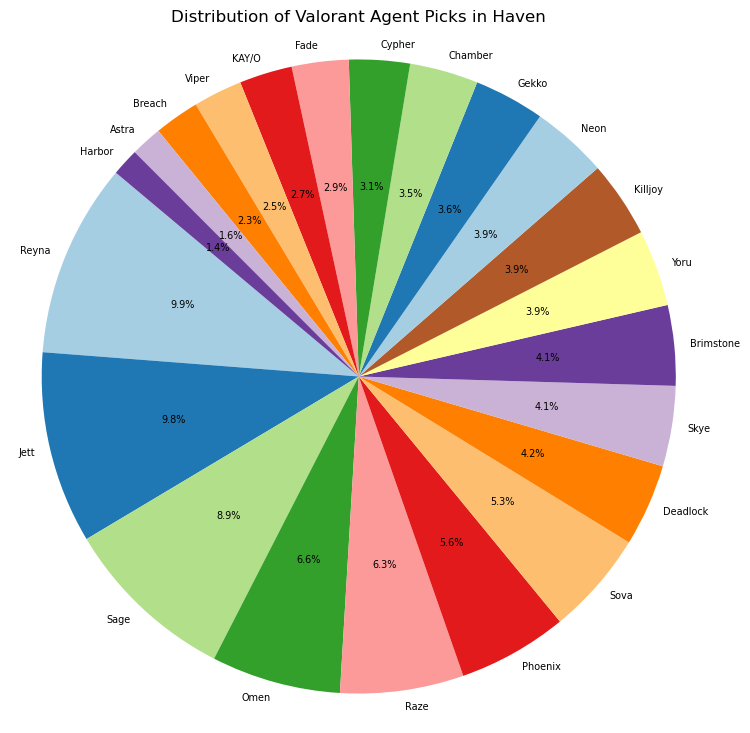

In [30]:
plt.figure(figsize=(9,9))
plt.pie(data_pickpcnt_sorted['pick_pcnt'], 
        labels=data_pickpcnt_sorted['agent'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors, 
        textprops={'fontsize': 7}, 
        labeldistance=1.05
       )
plt.title('Valorant Agent Pick Percentages')
plt.axis('equal')
plt.title("Distribution of Valorant Agent Picks in Haven")
plt.show()

#### FINDINGS:
Examining the "pick percentage" of Valorant agents on the Haven map reveals insights into agent popularity and player preferences. Agents with higher pick percentages are those that players frequently select, implying that their abilities are well-suited to the map's dynamics. Here's an exploration of the top-picked agents and their alignment with Haven's structure and characteristics:

**Tactical Trendsetters:**

Reyna, Jett, and Sage stand out as the most favored agents on the Haven map. These agents are not only highly versatile but also offer unique abilities that can tip the balance in their team's favor. Players are drawn to their skill sets, which can impact engagements, control map areas, and support teammates effectively.

**Map Mastery and Abilities:**

The high pick percentages of Reyna, Jett, and Sage underscore the alignment of their abilities with the challenges and opportunities presented by the Haven map. Reyna's ability to convert eliminations into advantages, Jett's agility to navigate the map, and Sage's healing and slowing abilities offer significant advantages. These agents' skills can be adapted strategically to bolster their team's chances of victory.

**Diverse Strategies:**

Omen, Raze, and Phoenix, though not as frequently picked as the top three, still maintain notable pick percentages. These agents bring diversity to strategies due to their unique utility and aggressive capabilities. Omen's teleports, Raze's explosive arsenal, and Phoenix's self-healing make them appealing choices for players looking to disrupt opponents and exert pressure.

**Adaptation to Havoc:**

Haven's three bombsites require adaptability and versatility. The popularity of agents like Killjoy, Skye, and Brimstone, with their strong utility and crowd control abilities, reflects players' recognition of the map's demand for area denial and information gathering. Killjoy's turret and lockdown, Skye's healing and flashes, and Brimstone's smokes contribute to team cohesion and map control.


Analyzing pick percentages on the Haven map reveals that agents like Reyna, Jett, and Sage are favored for their exceptional abilities that align with the map's structure. Their versatility and adaptability enable them to influence engagements, secure eliminations, and support teammates effectively. Additionally, the inclusion of agents like Omen, Raze, and Phoenix adds diversity to strategies, enabling players to cater to aggressive playstyles. As players continue to explore Haven's dynamic environment, they gravitate towards agents whose abilities synergize well with the map's challenges, ultimately contributing to their teams' success.

### Number of Matches of the Valorant Agents in Haven

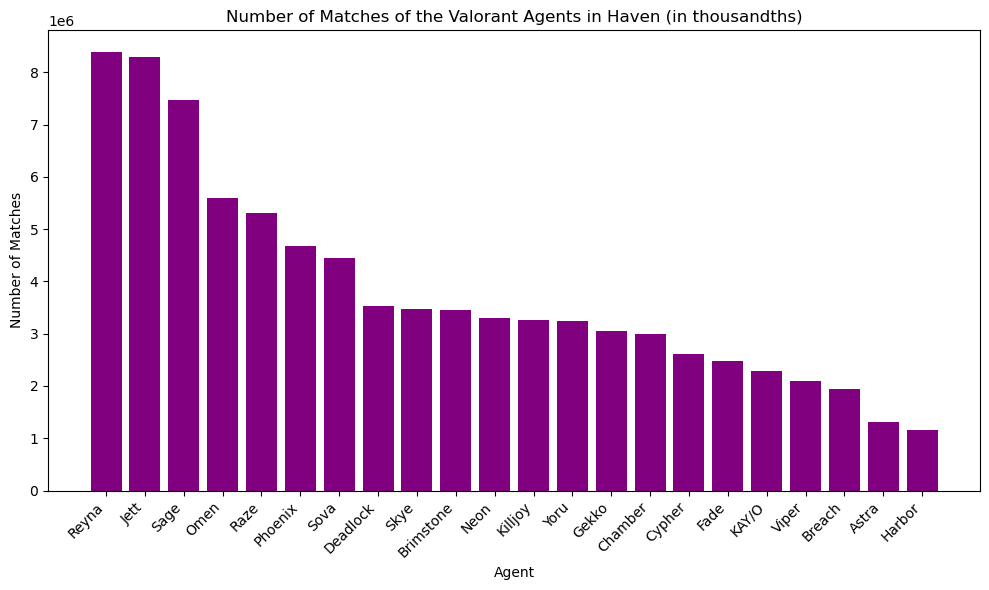

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(data_matches_sorted['agent'], data_matches_sorted['Matches'], color='purple')
plt.xlabel('Agent')
plt.ylabel('Number of Matches')
plt.title('Number of Matches of the Valorant Agents in Haven (in thousandths)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
Analyzing the "Matches" column sheds light on the agents that have seen the most action on the Haven map. Agents with high match counts are the stalwarts of the map, and their popularity might stem from a combination of adaptability, utility, and consistent performance. Let's delve into the agents who have proven their prowess on Haven and how their abilities intertwine with the map's dynamics:

**Steadfast Strategies:**

Reyna, Jett, and Sage emerge as the most frequently played agents on the Haven map, underlining their enduring popularity and effectiveness. These agents have established themselves as reliable picks due to their diverse abilities and the potential to impact engagements in various ways.

**Map Mastery and Abilities:**

The prevalence of Reyna, Jett, and Sage in the Haven matches attests to their suitability for the map's challenges. Reyna's capacity to convert eliminations into strengths, Jett's agility to traverse the map, and Sage's role in healing and control contribute to their consistent presence. These agents' abilities can be harnessed adeptly by skilled players to adapt to evolving match dynamics.

**Balanced Adaptation:**

In addition to the top three agents, there is a mix of picks that bring balance and versatility to the matches. Omen's strategic teleportation, Sova's information gathering, and Deadlock's disruptive capabilities all play into Haven's three-bombsite setup. These agents provide players with tools to control map areas, gather intel, and disrupt opponent strategies.

**Strategic Advantage:**

The popularity of Skye, Killjoy, and Brimstone showcases players' recognition of the importance of map control and information gathering. Skye's healing and utility, Killjoy's area denial, and Brimstone's smokes offer strategic advantages that resonate with Haven's multi-dimensional layout.


The "Matches" column highlights the agents that players consider consistent performers on the Haven map. The prevalence of Reyna, Jett, and Sage underscores their alignment with the map's dynamics and the versatility of their abilities. Additionally, the mix of Omen, Sova, and Deadlock demonstrates players' strategies for information gathering and area control. As players continue to engage in Haven matches, the enduring presence of these agents indicates that their abilities harmonize well with the map's design, contributing to their success and continued popularity.

### Valorant Agent Average Scores in Haven

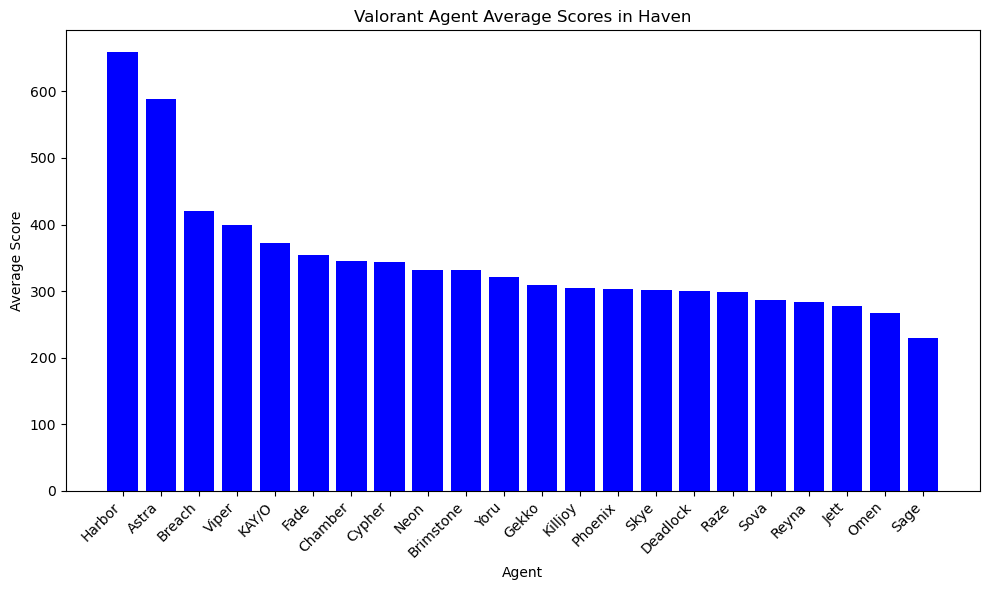

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(data_avgscore_sorted['agent'], data_avgscore_sorted['avg_score'], color='blue')
plt.xlabel('Agent')
plt.ylabel('Average Score')
plt.title('Valorant Agent Average Scores in Haven')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
The "avg_score" column unveils the agents who consistently achieve high scores, emphasizing their contributions to rounds and overall match outcomes. These agents have shown a propensity for impactful plays and efficient use of their abilities to influence engagements. Let's explore the agents with the highest average scores on the Haven map and how their abilities align with the map's dynamics:

**Strategic Pinnacle:**

Harbor and Astra stand out as the top agents with the highest average scores on Haven. Their ability to command and manipulate the battlefield gives them an edge in securing high-scoring rounds. Their strategic prowess in orchestrating the flow of the game contributes to their success.

**Adaptive Control:**

Breach and Viper also feature prominently in terms of average score. These agents are known for their crowd control and area denial abilities, respectively. In the context of Haven's multiple bombsites and entry points, these abilities can thwart opponent advancements and secure advantageous positions for the team.

**Dynamic Impact:**

Agents like KAY/O and Fade demonstrate that their consistent performances are not only due to their abilities but also their adaptability. KAY/O's suppression and Fade's mobility are impactful in both offensive and defensive situations, allowing them to excel in various scenarios Haven's layout presents.

**Tactical Mastery:**

Chamber, Cypher, and Neon showcase tactical excellence with high average scores. Chamber's versatility, Cypher's surveillance, and Neon's area control are essential traits that resonate well with Haven's multi-dimensional challenges. Their abilities allow for information gathering and strategic decision-making.

**Versatile Approach:**

Brimstone, Yoru, Gekko, and Killjoy secure their places among the top agents in terms of average score. Brimstone's smokes, Yoru's deception, Gekko's stealth, and Killjoy's area denial offer players versatile tools to adapt to changing dynamics and capitalize on opportunities.


The agents with high average scores on the Haven map are emblematic of their ability to influence rounds and outcomes. Harbor and Astra demonstrate a strategic edge, while Breach, Viper, and other agents wield control over the map. KAY/O, Fade, and others showcase adaptability, and Chamber, Cypher, Neon, and more display tactical brilliance. The agents' abilities align with the map's complexities, enabling them to secure high-scoring engagements and contribute to their team's success.

## Conclusion
In conclusion, the analysis of Valorant agent statistics on the Haven map provides valuable insights into the effectiveness of different agents in this unique and multifaceted environment. By examining key metrics such as Kill-Death Ratio (KD), Kill-Death-Assist Ratio (KDA), Win Percentage, Pick Percentage, Average Score, and the number of Matches played, we can draw important conclusions about which agents excel on this map and why.

Several common themes emerge from the data, shedding light on the qualities that contribute to an agent's success on the Haven map. These themes are vital for players seeking to optimize their team compositions and strategies for peak performance on this map:

1. **Role Diversity**: The Haven map favors a balanced team composition featuring Duelists, Initiators, and Controllers. This ensures the versatility needed to adapt to various scenarios and engage in both offensive and defensive strategies.

2. **Tactical Abilities**: Agents with tactical abilities that control the map, disrupt opponents, and gather information are highly effective on Haven. These abilities contribute to area denial, strategic positioning, and coordination within the team.

3. **Map Control**: Agents with abilities that manipulate the map environment, such as smokes, barriers, and teleports, excel on Haven. These abilities enable the team to influence engagements, create advantageous positions, and control key areas.

4. **Adaptability**: Versatile agents with kits suitable for diverse situations perform well on Haven. The dynamic nature of the map demands flexibility in both attack and defense, making agents like KAY/O and Fade stand out.

5. **Teamwork and Utility**: Agents that synergize with their team's composition and utilize their abilities collaboratively contribute to overall success. Cooperative plays involving smokes, flashes, and crowd control enhance the team's performance.

6. **Information Gathering**: Agents with information-gathering abilities, like Cypher and Killjoy, are invaluable for making strategic decisions based on enemy movements and activities.


Here are the top agents, numbered for your convenience, based on their performance and suitability for the Haven map:

1. **Skye**: With a balanced skill set that includes healing, crowd control, and map control abilities, Skye is a versatile choice for Haven. Her capabilities enable her to support the team in both offensive and defensive scenarios.

2. **Killjoy**: Known for her powerful area denial abilities, Killjoy excels in controlling the map and disrupting enemy plans. Her gadgets offer valuable defensive tools that can turn the tide of engagements.

3. **Jett**: Jett's mobility and agility make her an excellent choice for securing crucial positions and engaging enemies on Haven. Her ability to quickly reposition and challenge opponents gives her an edge in dynamic encounters.

4. **Reyna**: Reyna's aggressive playstyle and self-sustain abilities make her a force to be reckoned with on Haven. Her ability to secure frags and rapidly heal herself can be pivotal in intense firefights.

5. **Cypher**: As a master of information-gathering, Cypher's tools provide unparalleled intel on enemy movements. His traps and camera can help the team make informed decisions and anticipate enemy actions.

By strategically incorporating these top agents into team compositions and capitalizing on their unique strengths, players can greatly enhance their chances of success on the Haven map. Remember that diversity in roles, tactical coordination, and adaptability are key components of victory in Valorant. By aligning your agent choices

While there are standout agents, the key takeaway is that a balanced team composition with agents from different roles, combined with strategic coordination and tactical execution, contributes to exceptional results on the Haven map. As players strive to optimize their performance in Valorant, understanding the strengths of individual agents and their compatibility with the map's layout and characteristics is crucial for achieving victory on Haven.
